# Proyecto 9

La tienda en línea Amawow desea aumentar sus ingresos, para ello han recopilado información referente a las hipótesis que pueden ayudar a lograr esto, igualmente han proporcionado información referente a dos grupos de usuarios, A y B.

La finalidad de este proyecto será el priorizar las hipótesis adquiridas con la finalidad de saber cual o cuáles nos ayudarán a lograr nuestra meta, adicional a ello, se realizará un análisis A/B de la información proporcionada para saber si se tuvo un grupo lider con mejor rendimiento, si se debe detener la prueba o continuar con la misma para adquirir más información.

## Preparación de archivos CSV

### Importación de librerías y archivos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('/datasets/orders_us.csv')
df_visits = pd.read_csv('/datasets/visits_us.csv')

### Dataframe de hipótesis

In [3]:
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
df_hypotheses.head(5)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
df_hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [6]:
df_hypotheses.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

Se buscan valores nulos dentro de dataframe

In [7]:
df_hypotheses.duplicated().sum()

0

Se buscan valores duplicados en el dataframe

In [8]:
df_hypotheses.columns = df_hypotheses.columns.str.lower()

### Dataframe de órdenes

In [9]:
df_orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [12]:
df_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
df_orders.duplicated().sum()

0

In [14]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')

In [15]:
# Eliminar duplicados
df_orders.drop_duplicates(inplace=True)

# Filtrar los visitantes que aparecen en ambos grupos
visitors_group_counts = df_orders.groupby('visitorId')['group'].nunique()
visitors_both_groups = visitors_group_counts[visitors_group_counts == 2].index.tolist()

# Filtrar el dataframe para incluir solo los visitantes que no están en ambos grupos
df_orders = df_orders[~df_orders['visitorId'].isin(visitors_both_groups)]


Se filtra dataframe para quedar solo con los usuarios que no se encuentran dentro de los dos grupos

### Dataframe de visitas

In [16]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
df_visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
df_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [19]:
df_visits.duplicated().sum()

0

In [20]:
df_visits['date'] = pd.to_datetime(df_visits['date'], format='%Y-%m-%d')

## Priorización de hipótesis

### Calculo de ICE

In [21]:
df_hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [22]:
df_hypotheses['ICE'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

df_hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Las primeros 4 hipótesis con alto valor de ICE son la 8, 0, 7 y 4 teniendo la prioridad más alta la hipótesis 8.

### Cálculo de RICE

In [23]:
df_hypotheses['RICE'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

df_hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Al realizar el cálculo de RICE se valida que el posicionamiento cambia, eliminando la hipótesis 8 y colocando la número 2, ahora teniendo la prioridad la hipótesis 7.

### Comparación ICE y RICE

                                          hypothesis        ICE   RICE
0  Launch a promotion that gives users discounts ...  16.200000   16.2
1  Add two new channels for attracting traffic. T...  13.333333   40.0
2  Add a subscription form to all the main pages....  11.200000  112.0
3  Show banners with current offers and sales on ...   8.000000   40.0
4  Add product recommendation blocks to the store...   7.000000   56.0
5  Launch your own delivery service. This will sh...   2.000000    4.0
6  Add a customer review page. This will increase...   1.333333    4.0
7  Change the category structure. This will incre...   1.125000    9.0
8  Change the background color on the main page. ...   1.000000    3.0


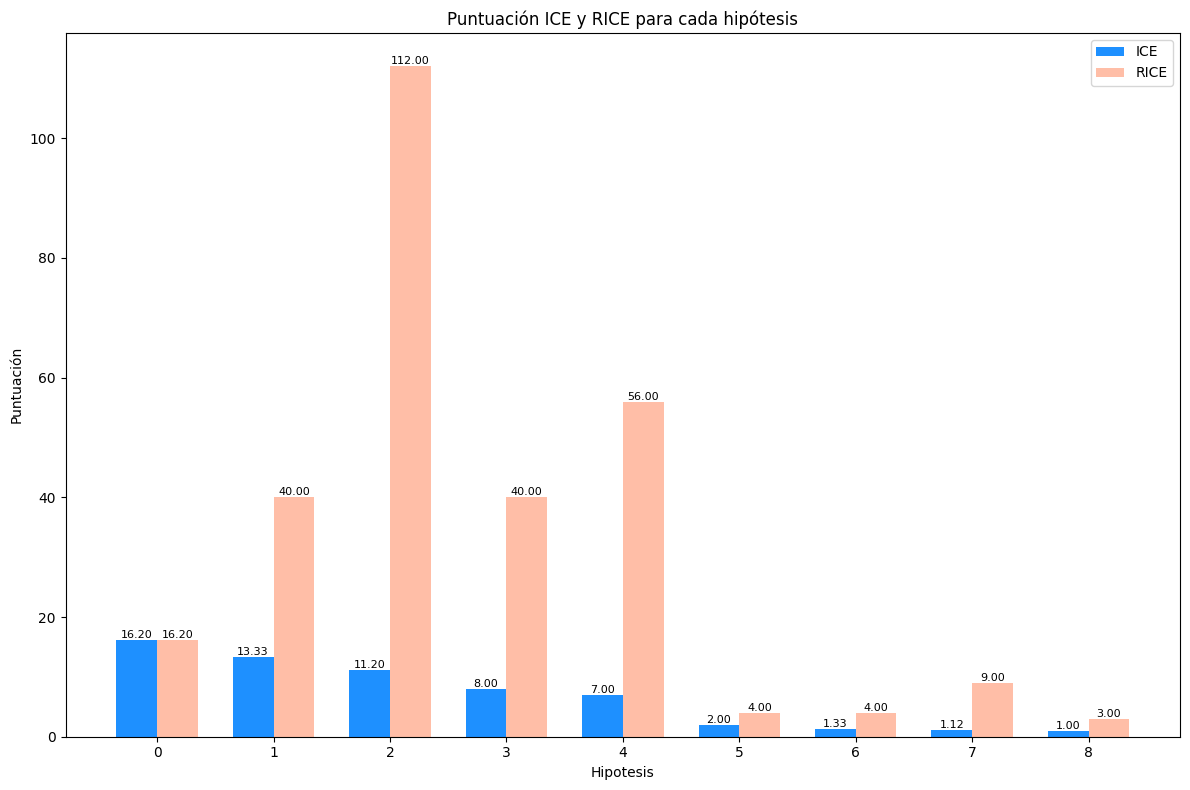

In [24]:
rice_info = df_hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
ice_info = df_hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


hypotheses_info = pd.merge(ice_info, rice_info, on='hypothesis')

print(hypotheses_info)

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(hypotheses_info))
plt.bar(index, hypotheses_info['ICE'], bar_width, color='dodgerblue', label='ICE')
plt.bar(index + bar_width, hypotheses_info['RICE'], bar_width, color='coral', label='RICE', alpha=0.5)
plt.xlabel('Hipotesis')
plt.ylabel('Puntuación')
plt.title('Puntuación ICE y RICE para cada hipótesis')
plt.xticks(index + bar_width / 2, range(len(hypotheses_info)))
plt.legend()

for i, ice_score, rice_score in zip(index, hypotheses_info['ICE'], hypotheses_info['RICE']):
    plt.text(i, ice_score, f'{ice_score:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    plt.text(i + bar_width, rice_score, f'{rice_score:.2f}', ha='center', va='bottom', color='black', fontsize=8)
    
plt.tight_layout()
plt.show()

Se valida que las hipotesis cambian al calcular ICE y RICE, ya que la hipótesis números dos aparece dentro de los 4 más altos al calcular RICE debido al alcance que tiene, dicha hipótesis no aparece dentro del cálculo de ICE debido al bajo impacto que tiene .
Dentro de RICE la hipotesis 8 toma el primer lugar por el alto impacto que esta puede tener en los usuarios pero al calcular RICE la hipótesis que toma el primer lugar es la número 7 debido a su alto impacto y alcance con los usuarios.

## Análisis de prueba A/B

### Datos acumulados

In [25]:
datesGroups = df_orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'],
df_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Obtén los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


### Ingresos acumulados por grupos

         date  revenue  orders
0  2019-08-01   2266.6      23
2  2019-08-02   3734.9      42
4  2019-08-03   5550.1      66
6  2019-08-04   6225.6      77
8  2019-08-05   7623.6      99
10 2019-08-06   8292.0     114
12 2019-08-07  10234.0     130
14 2019-08-08  11638.8     144
16 2019-08-09  13734.0     155
18 2019-08-10  16121.5     170
20 2019-08-11  17084.9     181
22 2019-08-12  20533.7     200
24 2019-08-13  24630.6     214
26 2019-08-14  25347.2     231
28 2019-08-15  26622.5     241
30 2019-08-16  28221.6     259
32 2019-08-17  28770.1     265
34 2019-08-18  29735.7     278
36 2019-08-19  32389.3     299
38 2019-08-20  33325.3     309
40 2019-08-21  36004.2     329
42 2019-08-22  37455.1     339
44 2019-08-23  38409.2     359
46 2019-08-24  40321.3     372
48 2019-08-25  41139.5     380
50 2019-08-26  43604.3     396
52 2019-08-27  46539.0     419
54 2019-08-28  48065.9     434
56 2019-08-29  51134.8     451
58 2019-08-30  52363.7     460
60 2019-08-31  53212.0     468


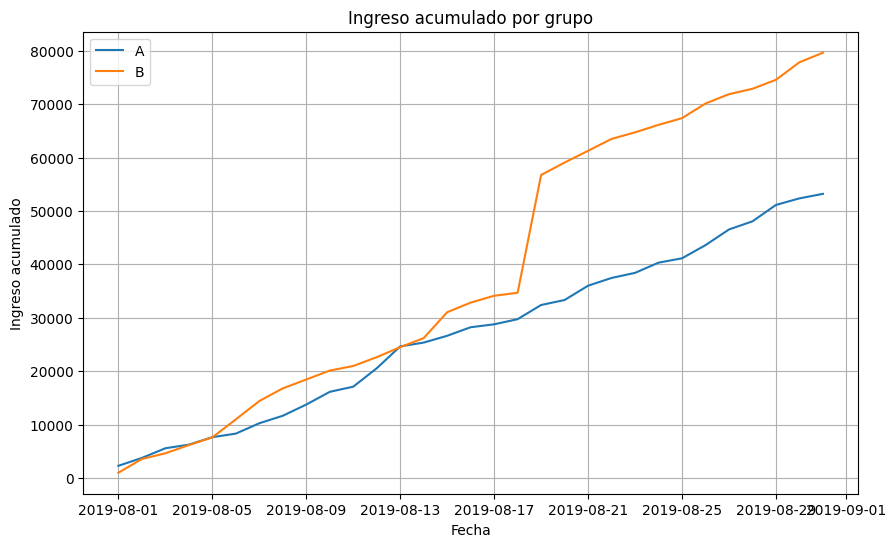

In [37]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

print(cumulativeRevenueA)

plt.figure(figsize=(10, 6))

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.title('Ingreso acumulado por grupo')
plt.legend()
plt.grid(True)
plt.show()



Se valida que durante la prueba se incrementó el ingreso para cada uno de los grupos durante la prueba, teniendo un aumento significativo en el grupo B esto puede ser debido a un aumento de pedidos dentro de ese grupo o algun pedido de mayor valor a los demás.

### Tamaño de pedido promedio acumulado por grupo

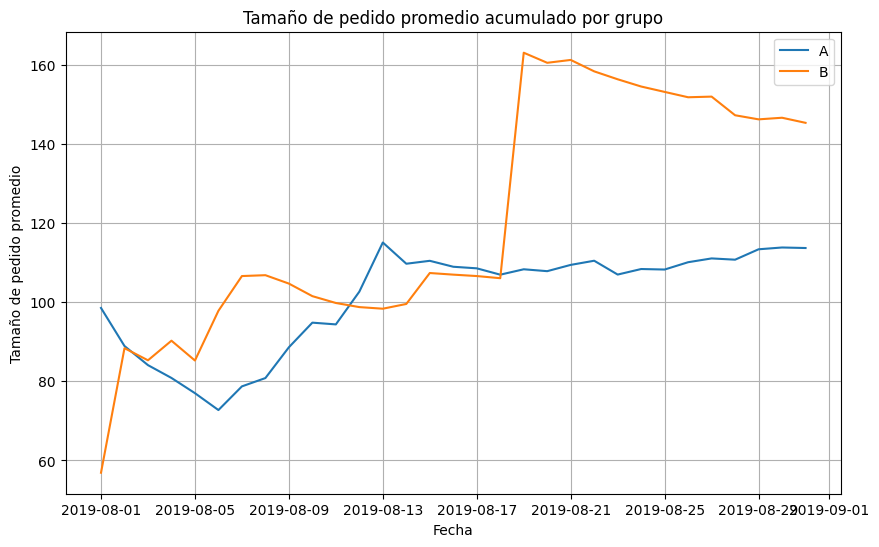

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio')
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.legend()
plt.grid(True)
plt.show()



Se valida que ambos grupos no tienen una estabilidad sólida, solo el grupo A se estabiliza un poco a diferencia del grupo B que tiene un alta durante el periodo de 2019-08-17 a 2019-08-21 para posteriormente ir de bajada 

### Diferencia relativa por grupo

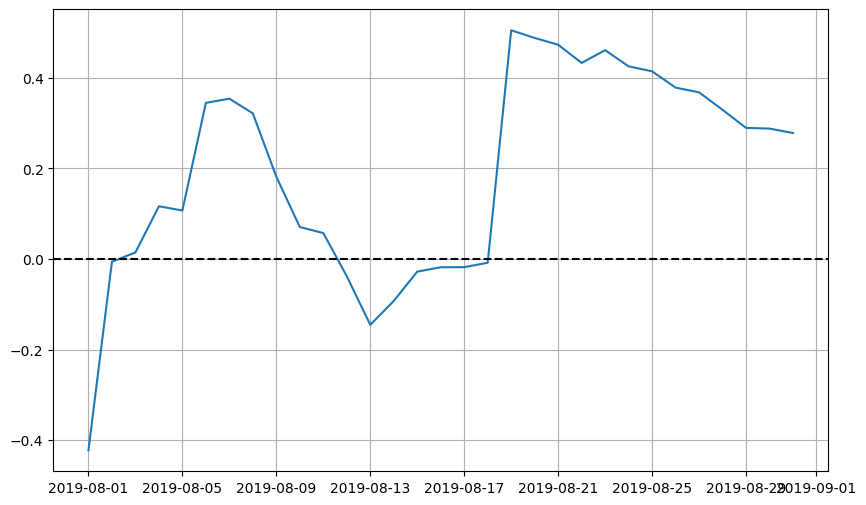

In [28]:
# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)



En ciertos puntos del gráfico la diferencia tiende a ser más elevada, esto puede deberse a pedidos más grandes de lo normal o incluso por valores atípicos dentro de la información

### Taza de conversión por cada grupo

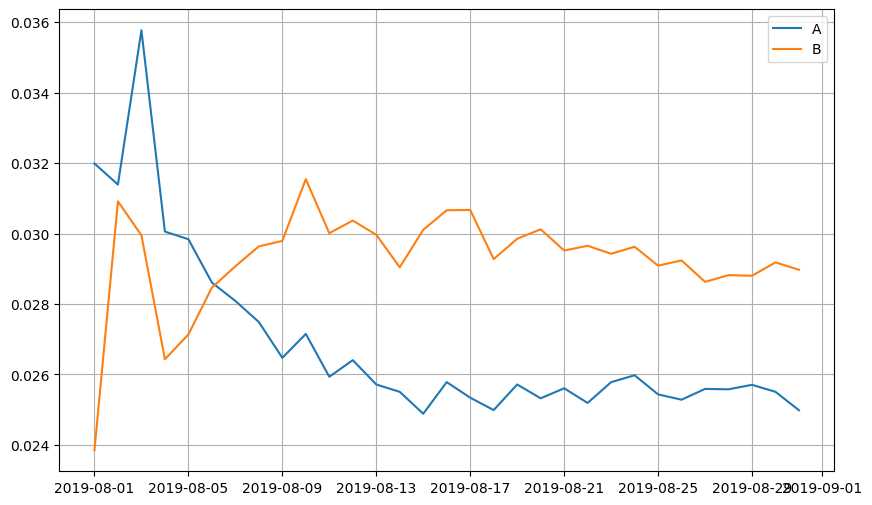

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10, 6))
# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid(True)



Al observar el gráfico se puede percatar de que la taza de conversión por parte del grupo A comienza bien durante el primer periodo de tiempo pero posteriormente disminuye la tasa de conversión.
A diferencia del grupo B el cual comienza teniendo una conversión baja a diferencia del grupo A, pero posteriormente aumente aun teniendo ciertos picos durante el periodo de la prueba.

### Ordenes por usuario

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


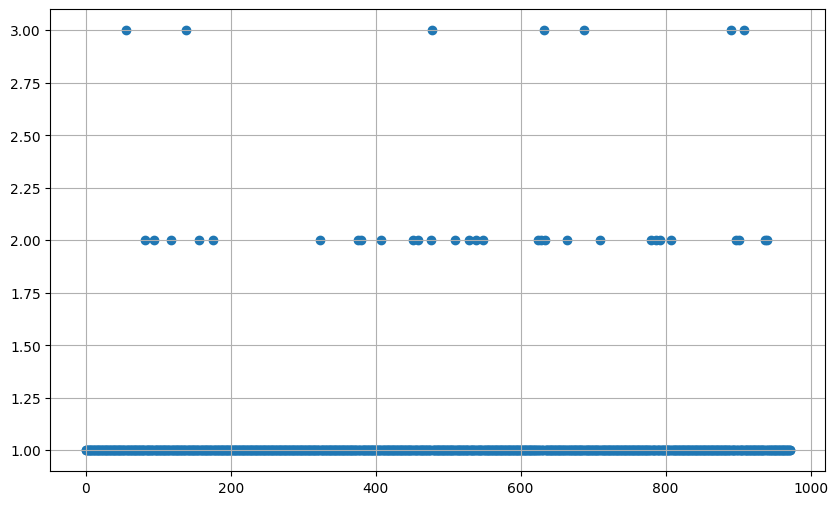

In [30]:
ordersByUsers = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders'])
# el rango de números desde 0 hasta el número de observaciones en ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.grid(True)

Se puede observar que una parte de usuarios tienden a realizar más de dos pedidos.

#### Percentil de pedidos por usuario

In [31]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Se puede observar que no mas del 5% de los usuarios realizaron más de un pedido y no mas del 1% de los usuarios realizaron 4 pedidos entonces se puede colocar como valor atípico más de dos pedidos pedidos

### Precios de pedidos

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A
949      1347999392   887908475 2019-08-21    930.0     A
940      2420050534  4003628586 2019-08-08    905.8     B
613      4071177889  3931967268 2019-08-07    830.3     B


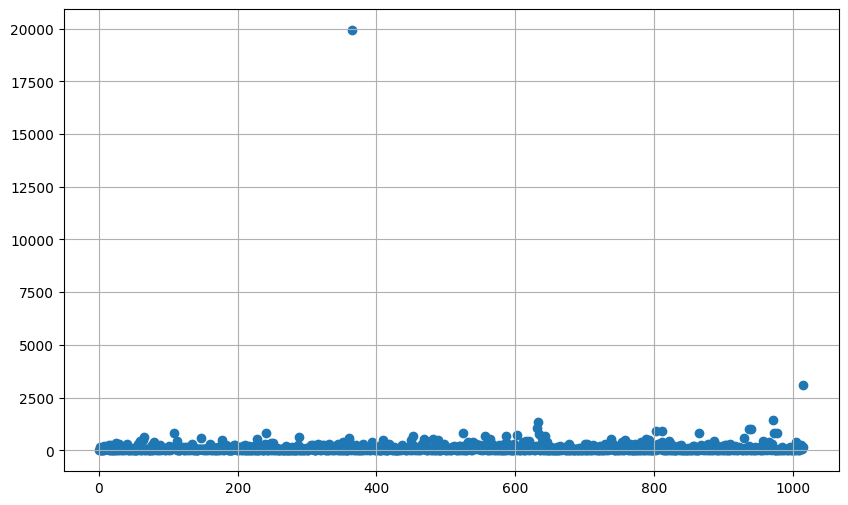

In [32]:
print(df_orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(df_orders['revenue'])))

plt.figure(figsize=(10, 6))

plt.scatter(x_values, df_orders['revenue'])

plt.grid(True)

Se puede apreciar que una cantidad muy pequeña de pedidos cuentan con valores superiores a los demás, con un valor superior a 2500 

#### Percentil precios por pedido

In [33]:
np.percentile(df_orders['revenue'], [95, 99])

array([414.275, 830.3  ])

Se aprecia que no más del 5% de los pedidos son superiores a `$414.27` y no más del 1% de pedidos superan un valor de `$830.3` entonces se puede considerar como anomalía aquellos valores superiores a `$414.27`



### Significancia estadística de la diferencia en la conversión entre los grupos

Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos A y B.

Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos A y B.

In [34]:
orders_per_group_date = df_orders.groupby(['date', 'group']).size().reset_index(name='orders')

visits_per_group_date = df_visits.groupby(['date', 'group'])['visits'].sum().reset_index()

merged_data = pd.merge(orders_per_group_date, visits_per_group_date, on=['date', 'group'])

# Calcular la tasa de conversión
merged_data['conversion_rate'] = merged_data['orders'] / merged_data['visits']

group_A_data = merged_data[merged_data['group'] == 'A']['conversion_rate']
group_B_data = merged_data[merged_data['group'] == 'B']['conversion_rate']

results = mannwhitneyu(group_A_data, group_B_data, alternative='less')

print("Valor p:", results.pvalue)

alpha = 0.05

# Evaluar la hipótesis
if results.pvalue < alpha:
    print("Hipótesis nula rechazada: la tasa de conversión del grupo A es significativamente menor que la del grupo B")
else:
    print("No se rechazó la hipótesis nula: no hay evidencia suficiente para afirmar que la tasa de conversión del grupo A es significativamente menor que la del grupo B")

Valor p: 0.026878539452366065
Hipótesis nula rechazada: la tasa de conversión del grupo A es significativamente menor que la del grupo B


### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos

Hipótesis nula (H0): No hay diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.

Hipótesis alternativa (H1): Existe una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B.

In [35]:
avg_order_size_group_A = df_orders[df_orders['group'] == 'A']['revenue'].mean()
avg_order_size_group_B = df_orders[df_orders['group'] == 'B']['revenue'].mean()

results = mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], df_orders[df_orders['group'] == 'B']['revenue'])

print("Valor p:", results.pvalue)

alpha = 0.05

# Evaluar la hipótesis
if results.pvalue < alpha:
    print("Hipótesis nula rechazada: hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B")
else:
    print("No se rechazó la hipótesis nula: no hay suficiente evidencia para afirmar que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B")

Valor p: 0.8622329690015668
No se rechazó la hipótesis nula: no hay suficiente evidencia para afirmar que hay una diferencia significativa en el tamaño promedio de pedido entre los grupos A y B


### Significancia estadística de la diferencia en la conversión entre los grupos (datos filtrados)

Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos A y B.

Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos A y B.

In [36]:
group_A_data = cumulativeData[cumulativeData['group'] == 'A']['conversion']
group_B_data = cumulativeData[cumulativeData['group'] == 'B']['conversion']

results = mannwhitneyu(group_A_data, group_B_data)

print("Valor p:", results.pvalue)

alpha = 0.05

# Evaluar la hipótesis
if results.pvalue < alpha:
    print("Hipótesis nula rechazada: hay una diferencia significativa en la conversión entre los grupos A y B")
else:
    print("No se rechazó la hipótesis nula: no hay suficiente evidencia para afirmar que hay una diferencia significativa en la conversión entre los grupos A y B.")

Valor p: 1.4496661752238628e-05
Hipótesis nula rechazada: hay una diferencia significativa en la conversión entre los grupos A y B


## Decisión 


De acuerdo al análisis realizado la decisión que se tomará será el considerar el grupo B como lider de la prueba debido al rendimiento referente a la conversión y al no haber una diferencia significativa en el tamaño promedio de pedidos entre ambos grupos.